<a href="https://colab.research.google.com/github/dinooooooi/dinooooi/blob/main/0401%EC%9B%94%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. introduction
계층적 알고리즘 : 부분 집합이 하나의 항목만 포함할 때까지 데이터 집합을 재귀적으로 더 작은 부분 집합으로 분할

세 가지 분할 알고리즘에 초점
K-Means, DBSCAN and Affinity Propagation

#2.Reading data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.5.3
numpy version: 1.25.2
seaborn version: 0.13.1


In [ ]:
mall_data = pd.read_csv('/content/Mall_Customers.csv')

print('There are {} rows and {} columns in our dataset.'.format(mall_data.shape[0],mall_data.shape[1]))

There are 200 rows and 5 columns in our dataset.


In [ ]:
mall_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
27,28,Male,35,28,61
23,24,Male,31,25,73
31,32,Female,21,30,73
192,193,Male,33,113,8
198,199,Male,32,137,18
91,92,Male,18,59,41
33,34,Male,18,33,92
185,186,Male,30,99,97
2,3,Female,20,16,6
147,148,Female,32,77,74


* Customer ID - numerical - unique customer number - integer
* Gender - categorical - binary (Male/Female) 월핫인코딩 권장 x
* Age - numerical - integer
* Annual Income (k$) - numerical - integer
* Spending Score (1-100) - numerical - integer

In [ ]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

누락된 데이터가 없음
#3. Exploratory Data Analysis
##3.1 Distributions
성별에 따라 계층화

In [ ]:
males_age = mall_data[mall_data["Gender"]=="Male"]["Age"]
females_age = mall_data[mall_data["Gender"]=="Female"]["Age"]

age_bins = range(15,75,5)

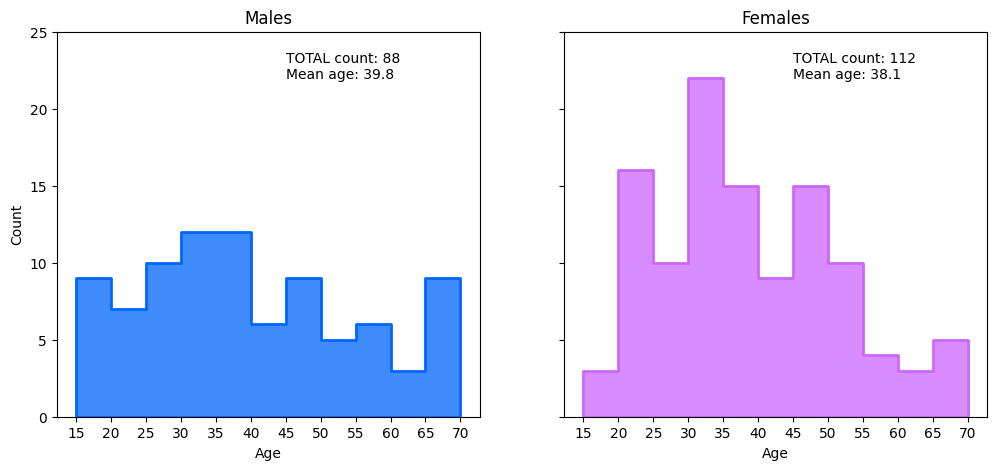

In [ ]:
fig2, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.histplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=axes[0], element='step', linewidth=2)
axes[0].set(xticks=age_bins, ylim=(0, 25), title='Males', ylabel='Count')
axes[0].text(45, 23, f"TOTAL count: {males_age.count()}")
axes[0].text(45, 22, f"Mean age: {males_age.mean():.1f}")

sns.histplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=axes[1], element='step', linewidth=2)
axes[1].set(xticks=age_bins, title='Females', ylabel='Count')
axes[1].text(45, 23, f"TOTAL count: {females_age.count()}")
axes[1].text(45, 22, f"Mean age: {females_age.mean():.1f}")

plt.show()

In [ ]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


남성 고객의 평균 연령은 여성보다 약간 높음
남성 연령의 분포가 여성보다 더 균일 - 가장 큰 연령 집단이 30-35세임
Kolgomorov-Smirnov 검정은 이 두 집단 간의 차이가 통계적으로 유의하지 않다는 것을 보여줌

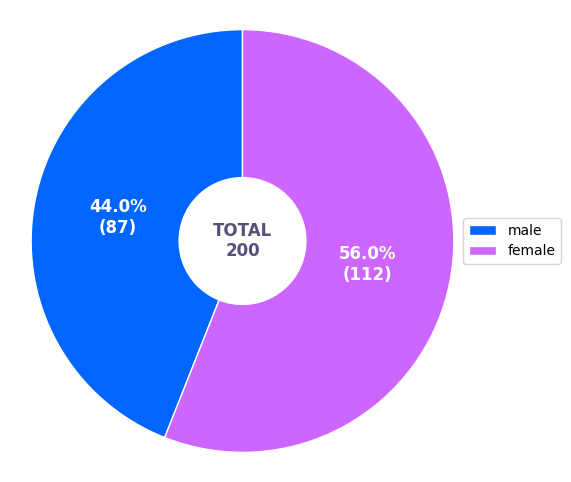

In [ ]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()] #wedge sizes
fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#0066ff','#cc66ff'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male','female'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(mall_data['Age'].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')  # Equal aspect ratio
plt.show()

여성이 더 많음

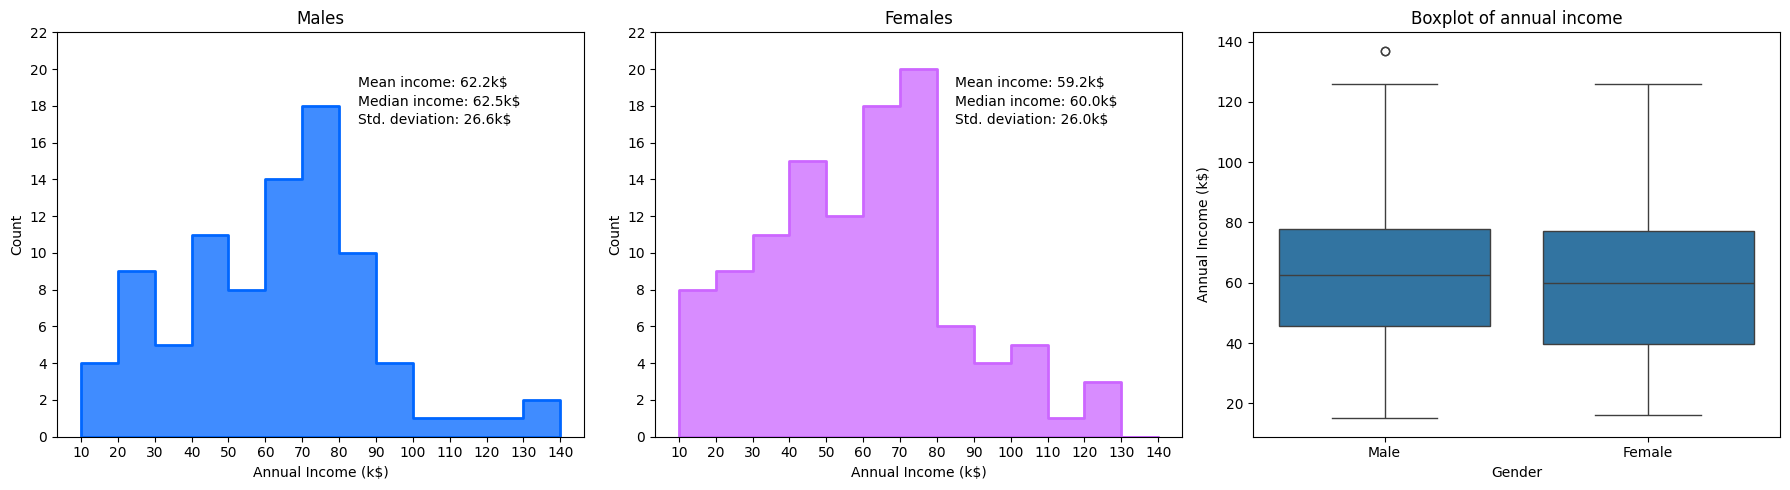

In [ ]:
males_income = mall_data[mall_data['Gender'] == 'Male']['Annual Income (k$)']
females_income = mall_data[mall_data['Gender'] == 'Female']['Annual Income (k$)']

my_bins = range(10, 150, 10)

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


sns.histplot(data=males_income, bins=my_bins, kde=False, color='#0066ff', ax=axes[0], element='step', linewidth=2)
axes[0].set(xticks=my_bins, yticks=range(0, 24, 2), ylim=(0, 22), title='Males', ylabel='Count')
axes[0].text(85, 19, f"Mean income: {males_income.mean():.1f}k$")
axes[0].text(85, 18, f"Median income: {males_income.median():.1f}k$")
axes[0].text(85, 17, f"Std. deviation: {males_income.std():.1f}k$")


sns.histplot(data=females_income, bins=my_bins, kde=False, color='#cc66ff', ax=axes[1], element='step', linewidth=2)
axes[1].set(xticks=my_bins, yticks=range(0, 24, 2), ylim=(0, 22), title='Females', ylabel='Count')
axes[1].text(85, 19, f"Mean income: {females_income.mean():.1f}k$")
axes[1].text(85, 18, f"Median income: {females_income.median():.1f}k$")
axes[1].text(85, 17, f"Std. deviation: {females_income.std():.1f}k$")


sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_data, ax=axes[2])
axes[2].set_title('Boxplot of annual income')


plt.tight_layout()
plt.show()

In [ ]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


남성의 평균소득이 더 높음
K-S 검정은 이 두 그룹이 통계적으로 다르지 않음을 보여줌

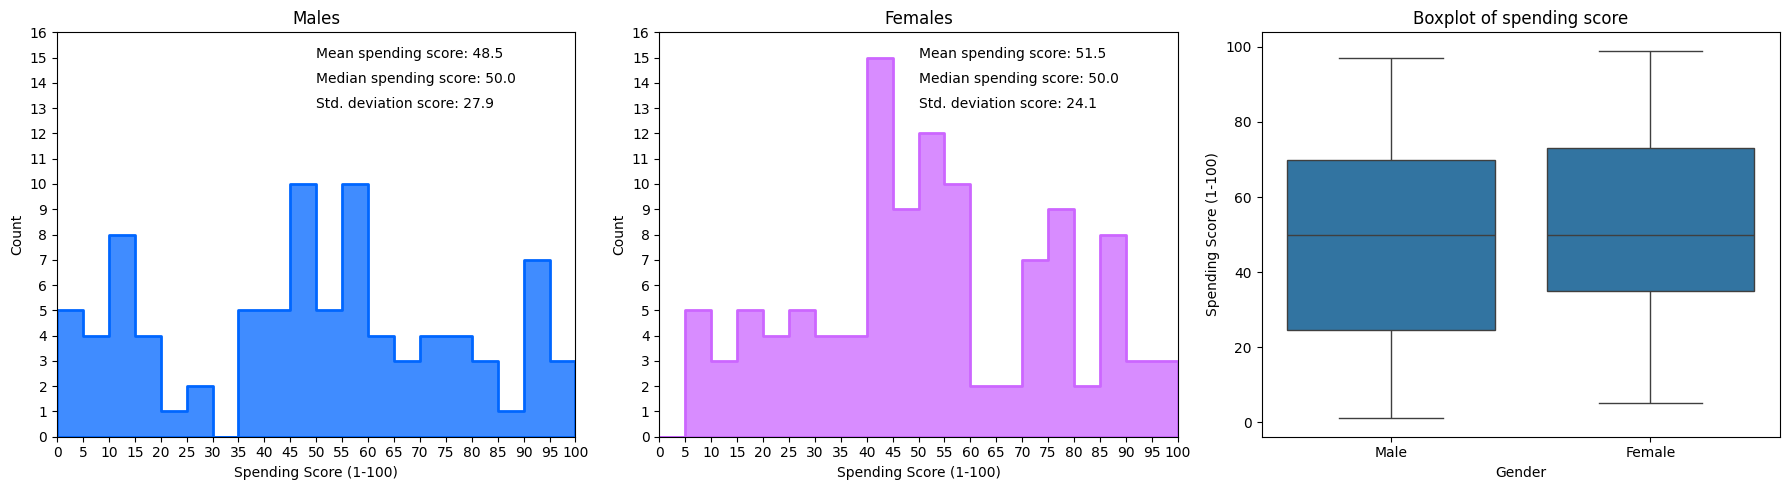

In [ ]:
males_spending = mall_data[mall_data['Gender']=='Male']['Spending Score (1-100)']
females_spending = mall_data[mall_data['Gender']=='Female']['Spending Score (1-100)']

spending_bins = range(0,105,5)

fig, axes = plt.subplots(1,3, figsize=(18,5))


sns.histplot(data=males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=axes[0], element='step', linewidth=2)
axes[0].set(xticks=spending_bins, xlim=(0, 100), yticks=range(0, 17, 1), ylim=(0, 16), title='Males', ylabel='Count')
axes[0].text(50, 15, f"Mean spending score: {males_spending.mean():.1f}")
axes[0].text(50, 14, f"Median spending score: {males_spending.median():.1f}")
axes[0].text(50, 13, f"Std. deviation score: {males_spending.std():.1f}")

sns.histplot(data=females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=axes[1], element='step', linewidth=2)
axes[1].set(xticks=spending_bins, xlim=(0, 100), yticks=range(0, 17, 1), ylim=(0, 16), title='Females', ylabel='Count')
axes[1].text(50, 15, f"Mean spending score: {females_spending.mean():.1f}")
axes[1].text(50, 14, f"Median spending score: {females_spending.median():.1f}")
axes[1].text(50, 13, f"Std. deviation score: {females_spending.std():.1f}")

sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=axes[2])
axes[2].set_title('Boxplot of spending score')

plt.tight_layout()
plt.show()

In [ ]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))

Kolgomorov-Smirnov test p-value: 0.29


여성의 평균 지출 점수가 더 높음

K-S 검정 p-값은 귀무 가설을 기각할 증거가 없다는 것을 나타내지만, 증거가 이전의 비교처럼 강하지는 않음

In [ ]:
medians_by_age_group = mall_data.groupby(["Gender", pd.cut(mall_data["Age"],age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(["Gender","Age_group"])
medians_by_age_group.reset_index(inplace=True)
medians_by_age_group

,Gender,Age_group,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,Female,"(15, 20]",112.0,19.0,63.0,50.0
1,Female,"(20, 25]",46.0,23.0,39.0,65.0
2,Female,"(25, 30]",139.5,29.0,74.5,73.0
3,Female,"(30, 35]",126.0,32.0,70.0,69.0
4,Female,"(35, 40]",138.5,38.0,73.5,41.0
5,Female,"(40, 45]",137.0,44.0,73.0,28.0
6,Female,"(45, 50]",82.0,49.0,54.0,44.5
7,Female,"(50, 55]",87.0,54.0,57.0,43.0
8,Female,"(55, 60]",74.0,58.0,50.0,35.0
9,Female,"(60, 65]",79.0,64.0,51.5,39.0


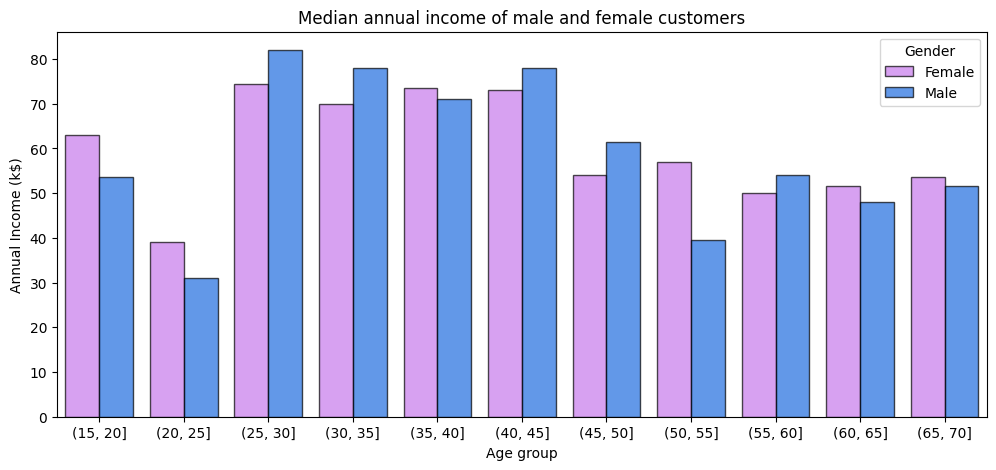

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

가장 부유한 고객의 연령 25-45세

25-30세(남성이 더 부유함), 50-55세(여성이 더 부유함)

##3.2 Correlations

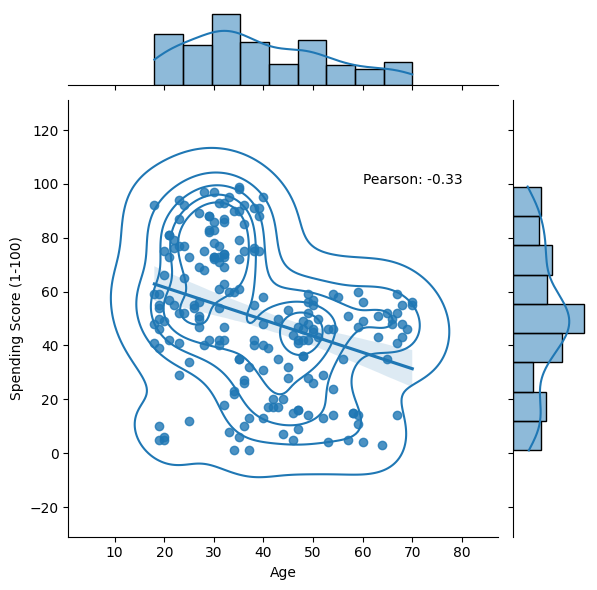

In [ ]:
from scipy.stats import pearsonr

# calculating Pearson's correlation
corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

jp = (sns.jointplot(x='Age', y='Spending Score (1-100)', data=mall_data,
kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(60, 100, 'Pearson: {:.2f}'.format(corr))
plt.show()

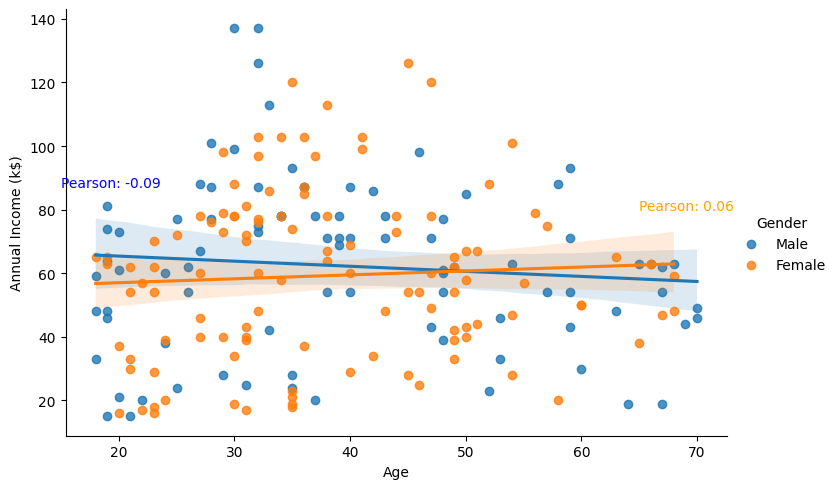

In [ ]:
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot(x='Age', y='Annual Income (k$)', data=mall_data, hue='Gender', aspect=1.5)

plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

연령과 연간 소득 사이에 크게 상관관계가 없다

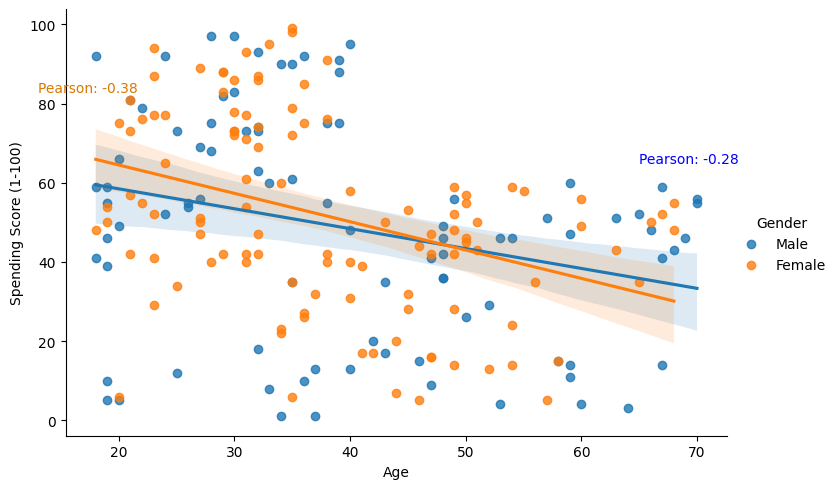

In [ ]:
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot(x='Age', y='Spending Score (1-100)', data=mall_data, hue='Gender',
          aspect=1.5)

plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

나이와 지출은 약한 상관관계 있음

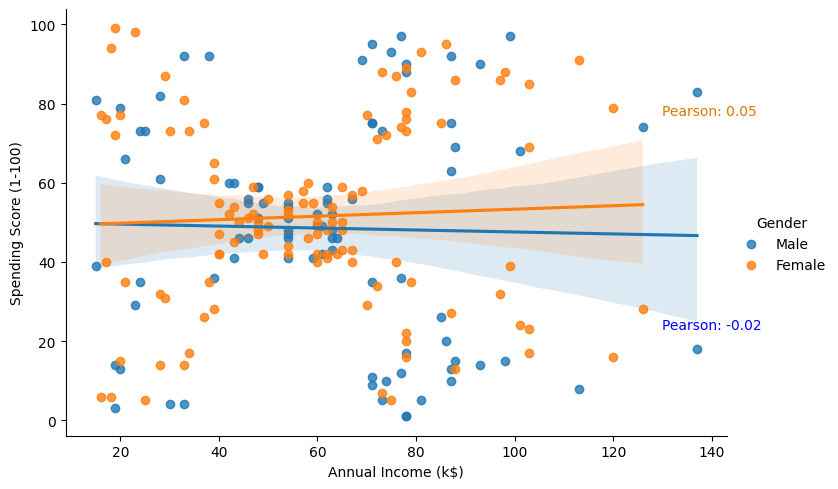

In [ ]:
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot(x= 'Annual Income (k$)', y='Spending Score (1-100)', data=mall_data, hue='Gender',
          aspect=1.5)

plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

연간 수입과 지출은 무시할 수 있는 상관관계 있음

#4. clustering

K-Means

Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

Affinity Propagation.

##4.1 K-means
###4.1.1 Description

1 시드 포인트를 사용해 샘플을 초기 그룹으로 나눔.  시드 포인트와 가장 가까운 샘플은 초기 클러스터 만듦

2 그룹의 중심점까지의 표본 거리를 계산하고 가장 가까운 표본을 군집에 할당

3 새로 생성된 클러스터 중심을 계산

알고리즘이 수렴할 때까지 반복

목표:모든 군집에서 목적 함수를 최소화하는 것

###4.1.2 Use case - customers segmentation

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# subset with numeric variables only
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

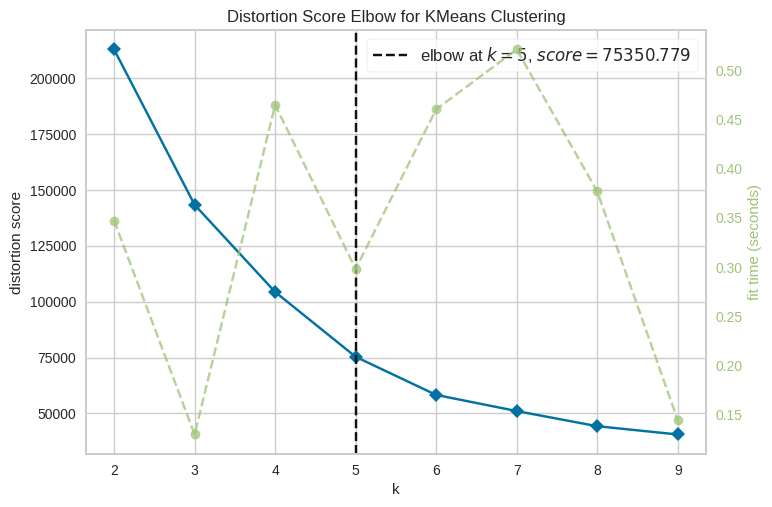

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1, n_init=30)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

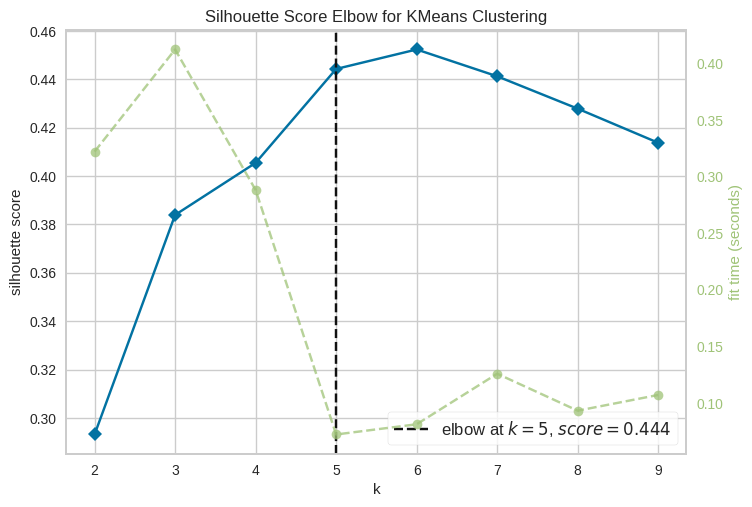

In [ ]:
model = KMeans(random_state=1, n_init=50)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [ ]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


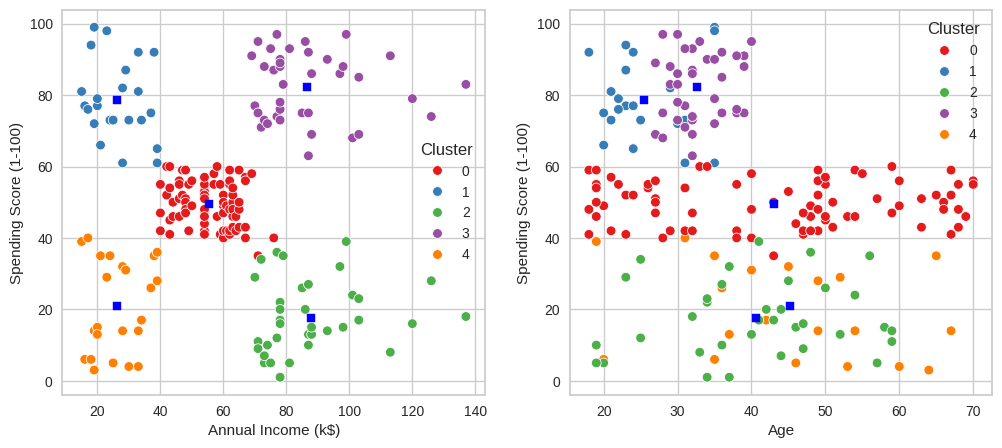

In [ ]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))

scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered,
hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered,
hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")

plt.show()

In [ ]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,79
1,23
2,36
3,39
4,23


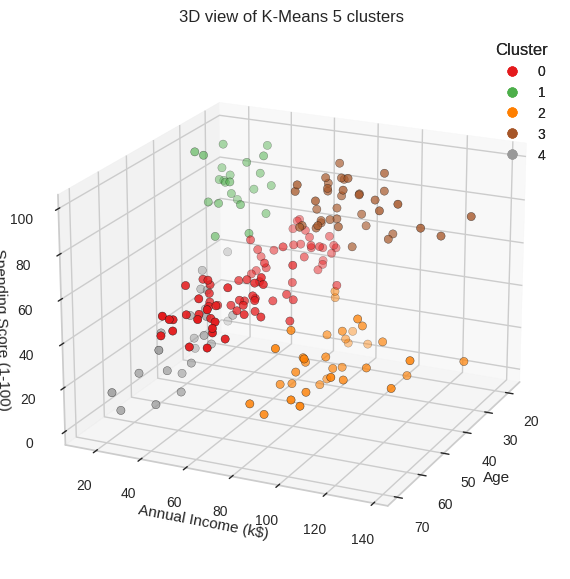

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d', elev=20, azim=210)
scatter = ax.scatter(KM5_clustered['Age'],
KM5_clustered['Annual Income (k$)'],
KM5_clustered['Spending Score (1-100)'],
c=KM5_clustered['Cluster'],
s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.azim = 25

# Create a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Cluster")
ax.add_artist(legend)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



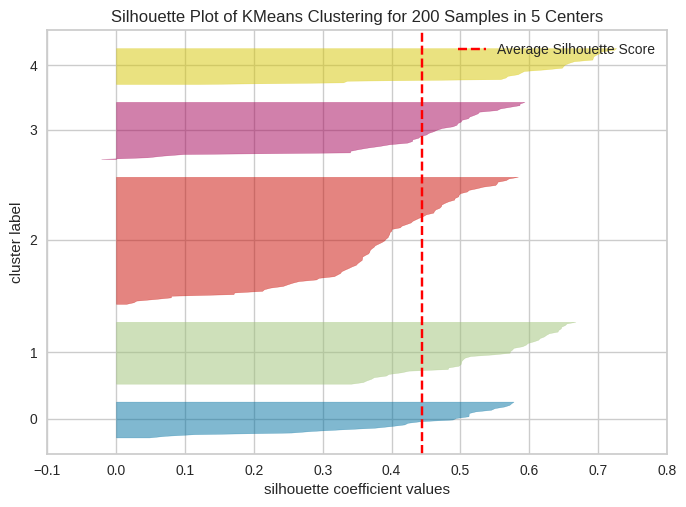

In [ ]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [ ]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ # append labels to points

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



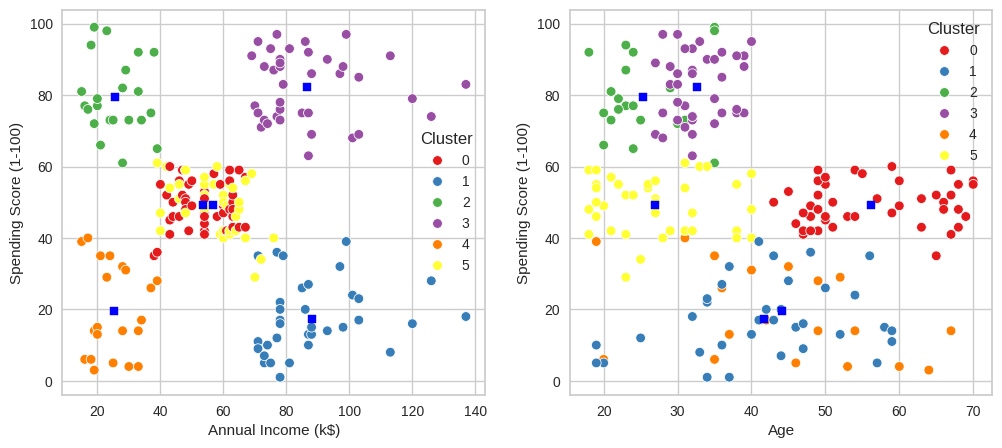

In [ ]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM6_clustered,
hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM6_clustered,
hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")

plt.show()

In [ ]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,45
1,35
2,22
3,39
4,21
5,38


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



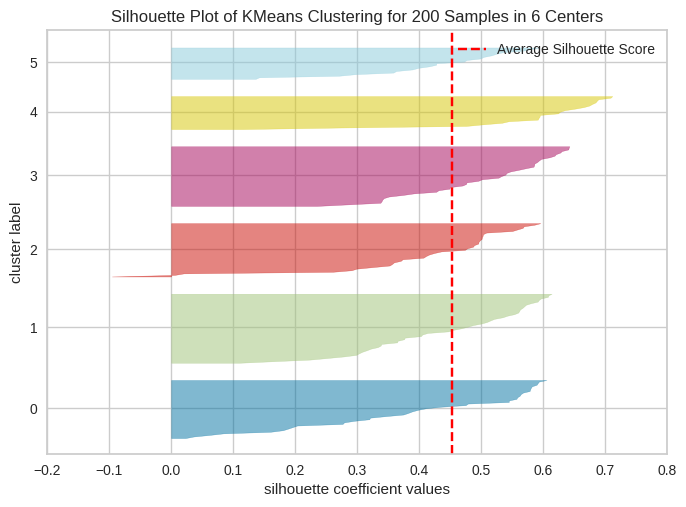

In [ ]:
# Plotly interactive 3D plot

trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
model = KMeans(n_clusters=6, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

##4.2 DBSCAN

###4.2.1 Description

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from itertools import product

eps_values = np.arange(8,12.75,0.25)
min_samples = np.arange(3,10)

DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
DBSCAN_params

[(8.0, 3),
 (8.0, 4),
 (8.0, 5),
 (8.0, 6),
 (8.0, 7),
 (8.0, 8),
 (8.0, 9),
 (8.25, 3),
 (8.25, 4),
 (8.25, 5),
 (8.25, 6),
 (8.25, 7),
 (8.25, 8),
 (8.25, 9),
 (8.5, 3),
 (8.5, 4),
 (8.5, 5),
 (8.5, 6),
 (8.5, 7),
 (8.5, 8),
 (8.5, 9),
 (8.75, 3),
 (8.75, 4),
 (8.75, 5),
 (8.75, 6),
 (8.75, 7),
 (8.75, 8),
 (8.75, 9),
 (9.0, 3),
 (9.0, 4),
 (9.0, 5),
 (9.0, 6),
 (9.0, 7),
 (9.0, 8),
 (9.0, 9),
 (9.25, 3),
 (9.25, 4),
 (9.25, 5),
 (9.25, 6),
 (9.25, 7),
 (9.25, 8),
 (9.25, 9),
 (9.5, 3),
 (9.5, 4),
 (9.5, 5),
 (9.5, 6),
 (9.5, 7),
 (9.5, 8),
 (9.5, 9),
 (9.75, 3),
 (9.75, 4),
 (9.75, 5),
 (9.75, 6),
 (9.75, 7),
 (9.75, 8),
 (9.75, 9),
 (10.0, 3),
 (10.0, 4),
 (10.0, 5),
 (10.0, 6),
 (10.0, 7),
 (10.0, 8),
 (10.0, 9),
 (10.25, 3),
 (10.25, 4),
 (10.25, 5),
 (10.25, 6),
 (10.25, 7),
 (10.25, 8),
 (10.25, 9),
 (10.5, 3),
 (10.5, 4),
 (10.5, 5),
 (10.5, 6),
 (10.5, 7),
 (10.5, 8),
 (10.5, 9),
 (10.75, 3),
 (10.75, 4),
 (10.75, 5),
 (10.75, 6),
 (10.75, 7),
 (10.75, 8),
 (10.75, 9),
 (11.0

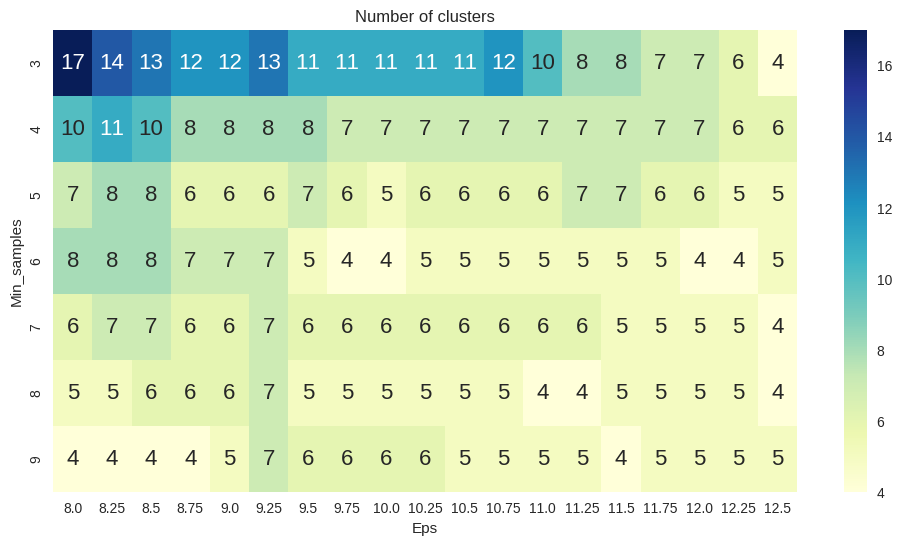

In [ ]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

In [ ]:
tmp

,Eps,Min_samples,No_of_clusters
0,8.0,3,17
1,8.0,4,10
2,8.0,5,7
3,8.0,6,8
4,8.0,7,6
...,...,...,...
128,12.5,5,5
129,12.5,6,5
130,12.5,7,4
131,12.5,8,4


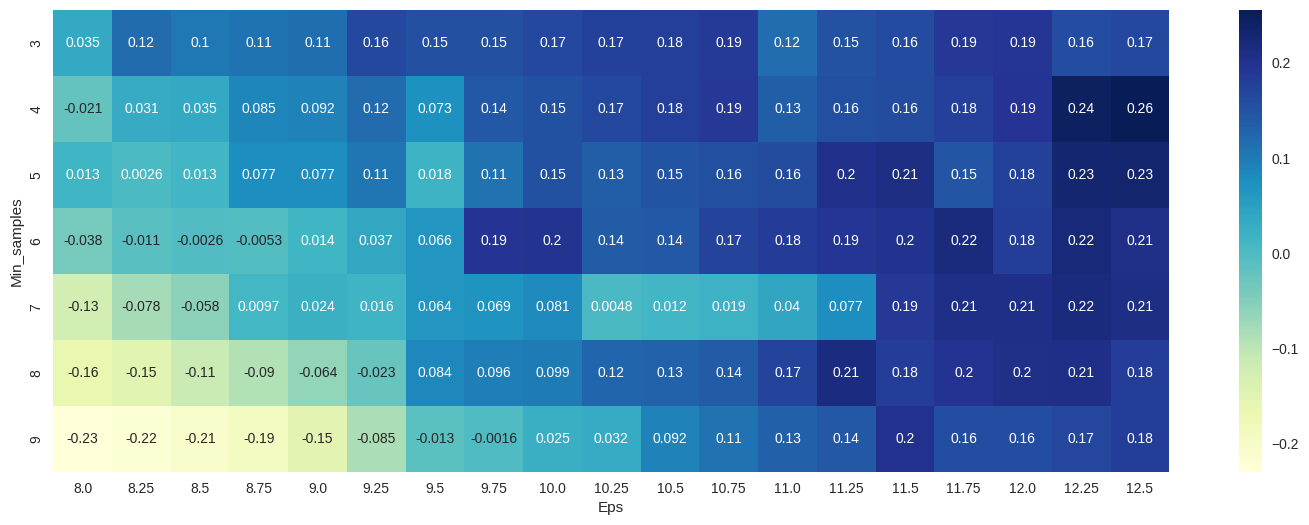

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [ ]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


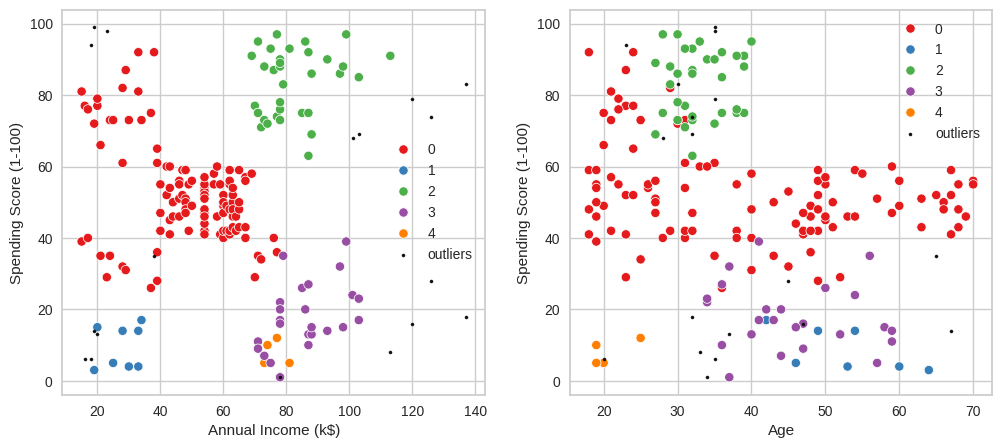

In [ ]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='Age', y='Spending Score (1-100)',
data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

##4.3 Affinity Propagation
###4.3.1 Description
###4.3.2 Use case - customers segmentation

In [ ]:
from sklearn.cluster import AffinityPropagation

In [ ]:
no_of_clusters = []
preferences = range(-20000,-5000,100) # arbitraty chosen range
af_sil_score = [] # silouette scores

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(X_numerics)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(X_numerics, AF.labels_))

af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning:

Affinity propagation did not converge, this model may return degenerate cluster centers and labels.



,preference,clusters,sil_score
82,-11800.0,6.0,0.451649
27,-17300.0,6.0,0.451491
51,-14900.0,6.0,0.451491
52,-14800.0,6.0,0.451440
28,-17200.0,6.0,0.451440


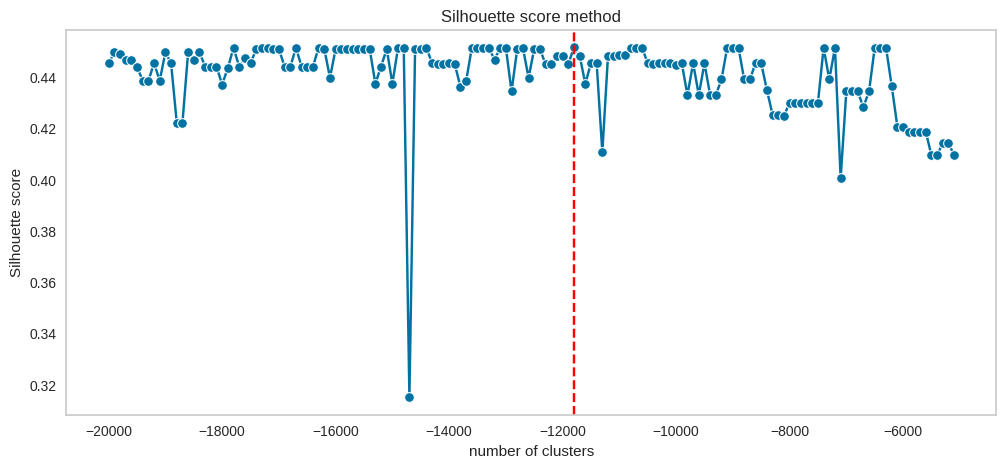

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=preferences, y=af_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(-11800, ls="--", c="red")
plt.grid()
plt.show()

In [ ]:
AF = AffinityPropagation(preference=-11800).fit(X_numerics)
AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_ # append labels to points
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


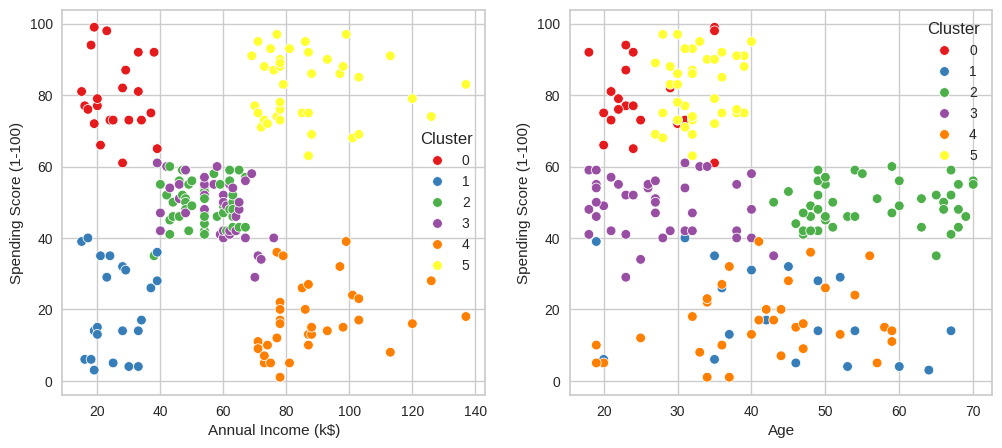

In [ ]:
fig3, (ax_af) = plt.subplots(1,2,figsize=(12,5))

scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=AF_clustered,
hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=AF_clustered,
hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')


plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

#5. Comparison and discussion

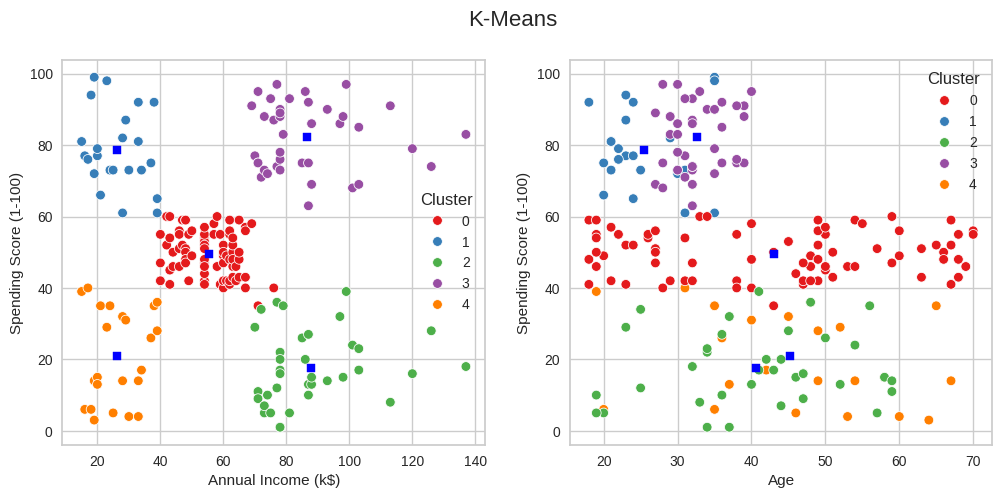

In [ ]:
fig1.suptitle('K-Means', fontsize=16)
fig1

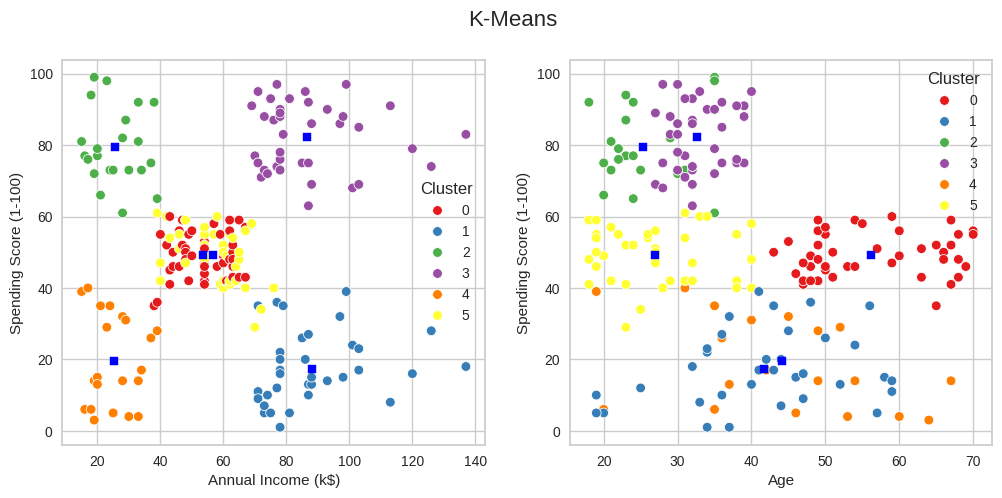

In [ ]:
fig11.suptitle('K-Means', fontsize=16)
fig11

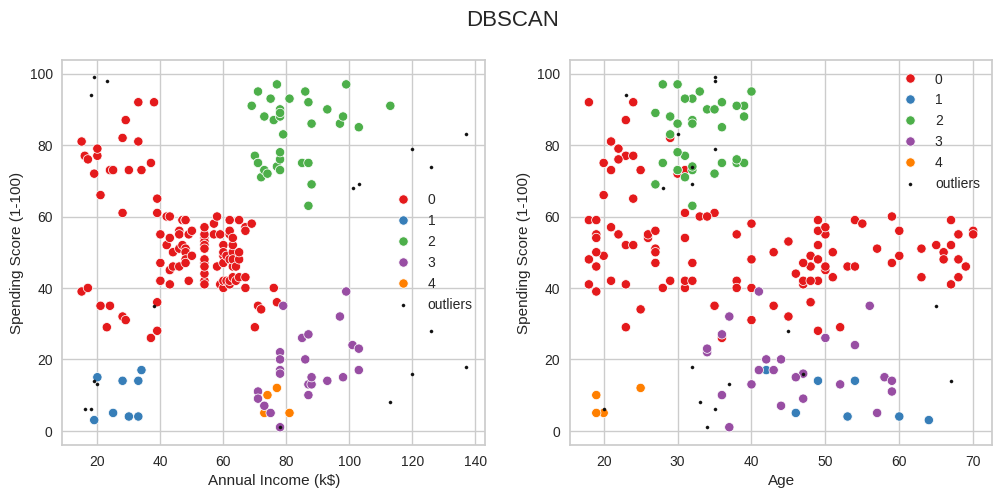

In [ ]:
fig2.suptitle('DBSCAN', fontsize=16)
fig2

In [ ]:
clusters = pd.concat([KM6_clust_sizes, DBSCAN_clust_sizes, AF_clust_sizes],axis=1, sort=False)
clusters

,KM_size,DBSCAN_size,AF_size
Cluster,,,
0,45.0,112.0,22.0
1,35.0,8.0,22.0
2,22.0,34.0,44.0
3,39.0,24.0,39.0
4,21.0,4.0,34.0
5,38.0,NaN,39.0
-1,NaN,18.0,NaN


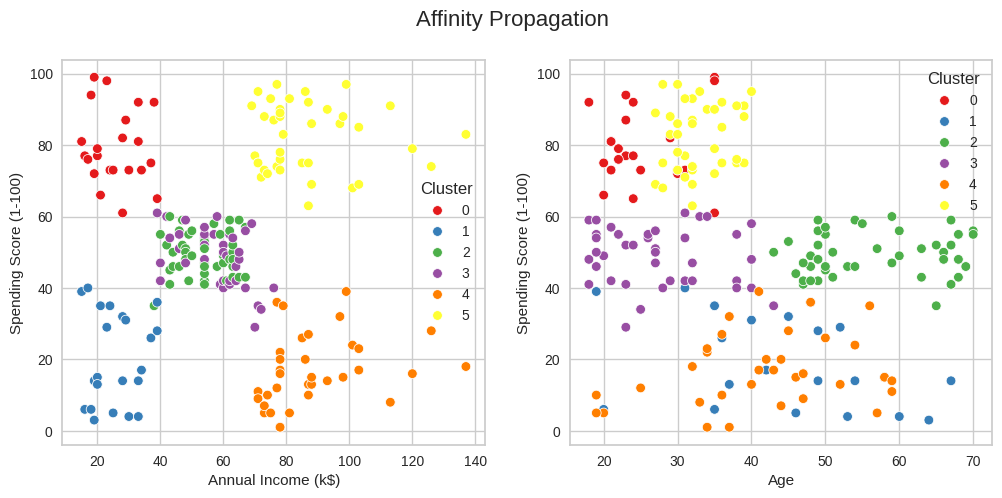

In [ ]:
fig3.suptitle('Affinity Propagation', fontsize=16)
fig3